#PhlyGreen Tutorial 

Import packages

In [40]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [41]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)

Create instance of Aircraft object.

In [42]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery)

Create the connections with its subsystems.

In [43]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft

Define input dictionaries

Constraints ordering:
[0] : cruise,
[1] : take-off,
[2] : climb,
[3] : turn,
[4] : ceiling,
[5] : acceleration,
[6] : landing 

In [44]:
ConstraintsInput = {'Cruise': {'Speed': 0.4, 'Speed Type':'Mach', 'Beta': 0.95, 'Altitude': 8000.},
         'AEO Climb': {'Speed': 170, 'Speed Type':'KCAS', 'Beta': 0.97, 'Altitude': 6000., 'ROC': 5},
         'OEI Climb': {'Speed': 104*1.2, 'Speed Type': 'KCAS', 'Beta': 1., 'Altitude': 0., 'Climb Gradient': 0.021},
         'Take Off': {'Speed': 140, 'Speed Type': 'KCAS', 'Beta': 0.985, 'Altitude': 100., 'kTO': 1.2, 'sTO': 950},
         'Landing':{'Speed': 104., 'Speed Type': 'KCAS', 'Altitude': 0.},
         'Turn':{'Speed': 210, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 5000, 'Load Factor': 1.1},
         'Ceiling':{'Speed': 0.5, 'Beta': 0.8, 'Altitude': 9500, 'HT': 0.5},
         'Acceleration':{'Mach 1': 0.3, 'Mach 2':0.4, 'DT': 180, 'Altitude': 6000, 'Beta': 0.9},
         'DISA': 0}

In [45]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.985,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [46]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.0}},
                 'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.45, 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0., 'phi_end':0.0 }},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

In [47]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Contingency Fuel': 130,
                   'Eta Gas Turbine Model': 'PW127',
                   #'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive Model': 'constant',
                   'Eta Propulsive': 0.75,
                   'Specific Power Powertrain': [3900,7700],  # W/Kg
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0,
                   'Eta PMAD': 0.99,
                   }

In [48]:
CellInput = {
    'Class': "II",
    'Model':'Finger-Cell-Thermal',
    'SpecificPower': 8000,
    'SpecificEnergy': 1500,
    'Minimum SOC': 0.2,
    'Ebat': 700 * 3600, # PhlyGreen uses this input only if Class == 'I'
    'pbat': 1000
    }

In [49]:
AerodynamicsInput = {'NumericalPolar': {'type': 'ATR42'},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}

Import input dictionaries

In [50]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.CellModel = CellInput

Set aircraft power configuration

In [51]:
# myaircraft.Configuration = 'Traditional'
myaircraft.Configuration = 'Hybrid'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'ATR'

Set inputs

In [52]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.SetInput()

#Initialize Battery Configurator
myaircraft.battery.SetInput()

Current ratio:12.932604735883423
peak power old:43.92
peak power new:568.0


/Users/mblandino/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Either run the Constraint Analysis....

In [53]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3328.8528528528527
Design P/W:  168.51352203046332
----------------------------------------


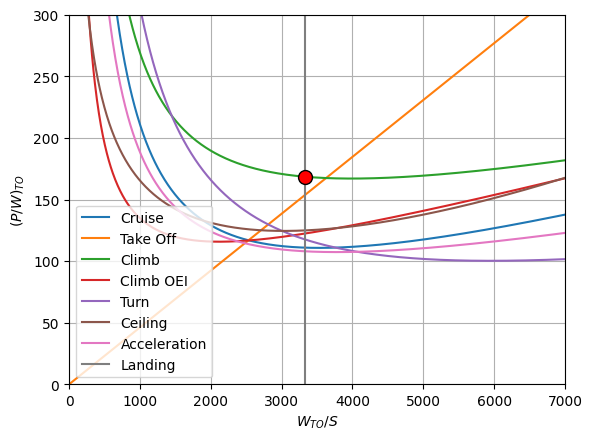

In [54]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$(P/W)_{TO}$')
plt.show()

Run Mission analysis to define the aircraft's masses

In [55]:
myaircraft.weight.WeightEstimation()

P_number:  127
P_number:  63
P_number:  31
P_number:  15
P_number:  7
P_number:  3
P_number:  1
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 300.0
P_number:  299
P_number:  149
P_number:  74
P_number:  37
P_number:  18
P_number:  9
P_number:  4
P_number:  2
P_number:  1
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 0.06838026226175137
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 0.8973108030828234
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 1.0106651462052356
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 1.0000507347922039
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration
ratio is 0.9999973125167326
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration


Wing surface can be readily estimated as S = WTO/(WTO/S)

In [56]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * myaircraft.performance.g_acc 

A summary of the preliminary design:

In [57]:
print('Fuel mass (trip + altn + loiter) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
if myaircraft.Configuration == 'Hybrid':
    print('Battery mass [Kg]:            ', myaircraft.weight.WBat)
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WBat + myaircraft.weight.WPayload)
else:
    print('Structure [Kg]:               ', myaircraft.weight.WStructure)
    print('Powertrain mass [Kg]:         ', myaircraft.weight.WPT)
    print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
    print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WPayload)

print('----------------------------------------')
print('Takeoff Weight: ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None:
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface: ', myaircraft.WingSurface, ' m^2')
print('TakeOff engine shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise engine shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('TakeOff battery peak power [kW]:           ', myaircraft.mission.TO_PBat/1000.)
print('Climb/cruise battery peak power [kW]:      ', myaircraft.mission.Max_PBat/1000.)

print('Sizing phase for thermal powertrain: ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )

if myaircraft.Configuration == 'Hybrid':
    if myaircraft.battery.BatteryClass == 'II':
        print('-------------Battery Specs-------------')
        print('Battery Pack Energy [kWh]:           ', myaircraft.battery.pack_energy/1000)
        print('Battery Pack Max Power [kW]:         ', myaircraft.battery.pack_power_max/1000)
        print('Battery Pack Specific Energy [Wh/kg]:',(myaircraft.battery.pack_energy)/myaircraft.weight.WBat)
        print('Battery Pack Specific Power [kW/kg]: ',(myaircraft.battery.pack_power_max/1000)/myaircraft.weight.WBat)
        print('Battery Configuration: ', f"S{myaircraft.battery.S_number} P{myaircraft.battery.P_number}" )



Fuel mass (trip + altn + loiter) [Kg]:  2069.762662180792
Block Fuel mass [Kg]:          2199.762662180792
Battery mass [Kg]:             12.495999999999999
Structure [Kg]:                10314.44071973998
Powertrain mass [Kg]:          1018.0335145952324
Empty Weight [Kg]:             11844.970234335211
Zero Fuel Weight [Kg]:         16404.97023433521
----------------------------------------
Takeoff Weight:  18604.76700047687
Wing Surface:  54.82752537958031  m^2
TakeOff engine shaft peak power [kW]:       3970.3307069214065
Climb/cruise engine shaft peak power [kW]:  -0.001
TakeOff battery peak power [kW]:            0.0
Climb/cruise battery peak power [kW]:       -0.001
Sizing phase for thermal powertrain:  Takeoff peak power
-------------Battery Specs-------------
Battery Pack Energy [kWh]:            18.743999999999996
Battery Pack Max Power [kW]:          99.64921604840754
Battery Pack Specific Energy [Wh/kg]: 1499.9999999999998
Battery Pack Specific Power [kW/kg]:  7.97448912039

Some plots:

In [58]:
times = np.array([])
Ef = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef = np.concatenate([Ef, array.y[0]])
    beta = np.concatenate([beta, array.y[1]])

Take-Off Propulsive Power over Takeoff Mass

In [59]:
# print(dir(mission))
# toplot = np.array(mission.plottingVars)
# soc   = toplot[:, 1]
# v_oc  = toplot[:, 2]
# v_out = toplot[:, 3]
# curr  = toplot[:, 4]
# temp  = toplot[:, 5]
# atemp = toplot[:, 6]
# alt   = toplot[:, 7]
# plt.plot(times/60, soc)
# plt.xlabel('t [min]')
# plt.ylabel('SoC')
# plt.show()

In [60]:
myaircraft.performance.TakeOff(myaircraft.DesignWTOoS,myaircraft.constraint.TakeOffConstraints['Beta'], myaircraft.constraint.TakeOffConstraints['Altitude'],myaircraft.constraint.TakeOffConstraints['kTO'], myaircraft.constraint.TakeOffConstraints['sTO'], myaircraft.constraint.DISA, myaircraft.constraint.TakeOffConstraints['Speed'], myaircraft.constraint.TakeOffConstraints['Speed Type'])

153.65125462054286

Maximum mission Propusive Power over Takeoff Mass

In [61]:
max([myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))])

50.62144056632075

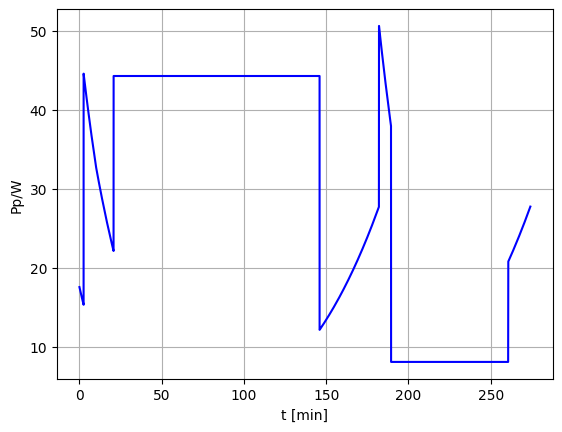

In [62]:
plt.plot(times/60,[myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W')
plt.show()

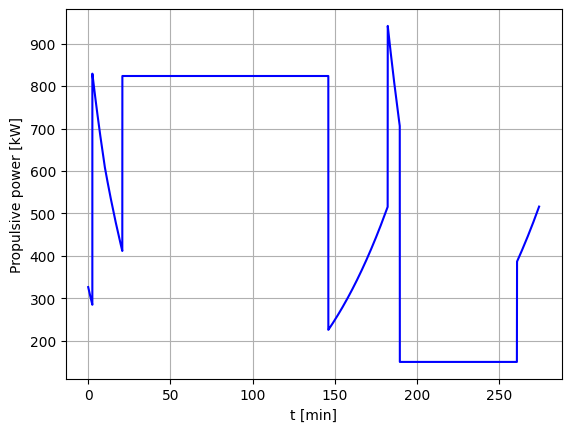

In [63]:
plt.plot(times/60,[(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
# pwsd[t]= 1e-3*0.5*0.89*(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Propulsive power [kW]')
plt.show()

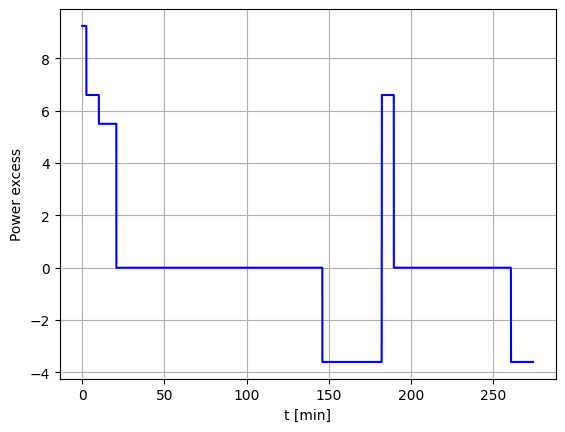

In [64]:
plt.plot(times/60,[myaircraft.mission.profile.PowerExcess(times[t]) for t in range(len(times))], 'b')
# pwsd[t]= 1e-3*0.5*0.89*(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Power excess')
plt.show()

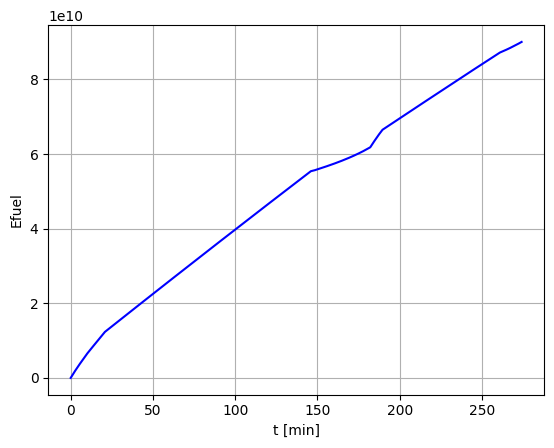

In [65]:
plt.plot(times/60,Ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Efuel')
plt.show()

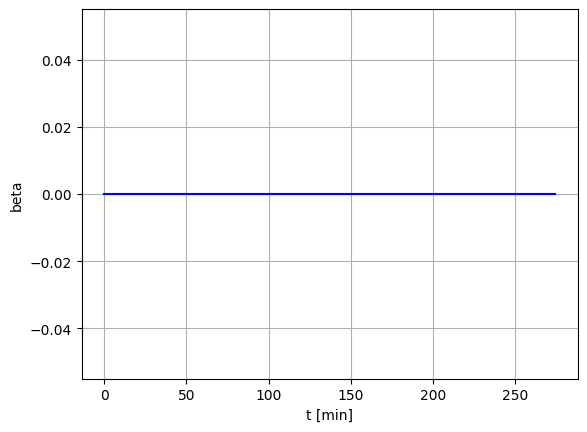

In [66]:
plt.plot(times/60,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('beta')
plt.show()

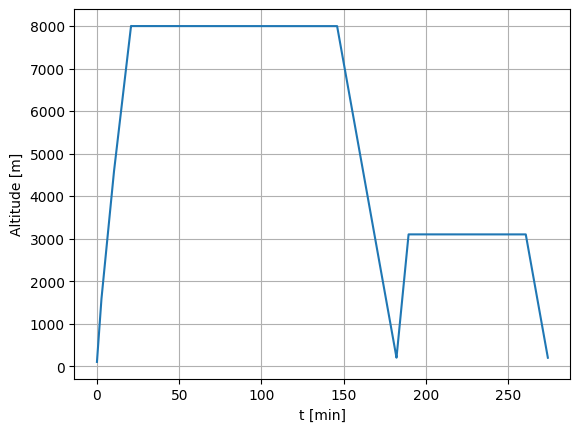

In [67]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()

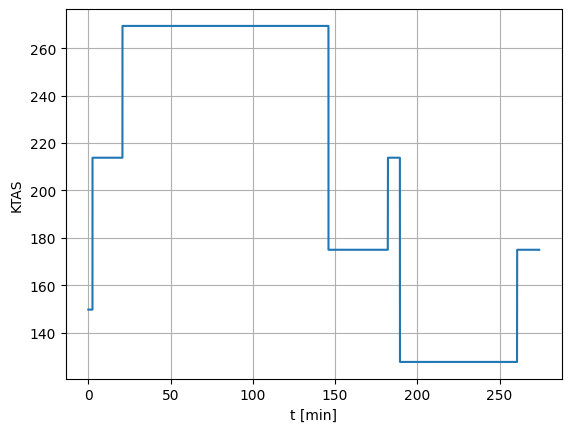

In [68]:
plt.plot(times/60,pg.Utilities.Units.MtoKN(mission.profile.Velocity(times)))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('KTAS')
plt.show()

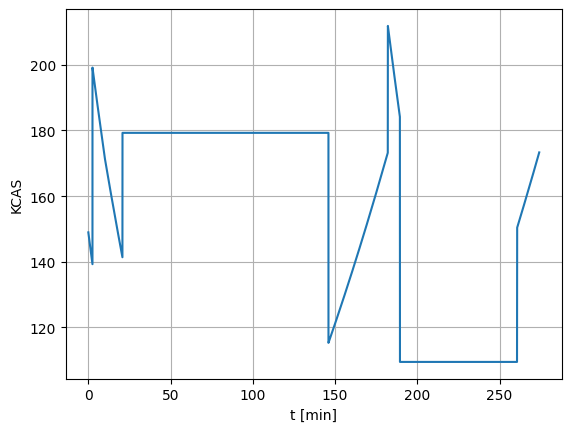

In [69]:
plt.plot(times/60,[pg.Utilities.Units.MtoKN(pg.Utilities.Speed.TAS2CAS(mission.profile.Velocity(t),mission.profile.Altitude(t))) for t in times])
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('KCAS')
plt.show()

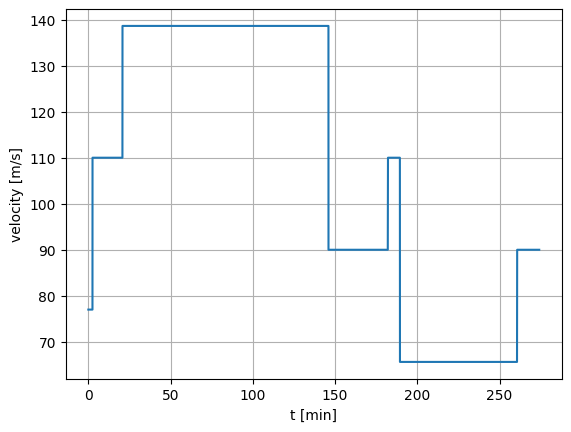

In [70]:
plt.plot(times/60,mission.profile.Velocity(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('velocity [m/s]')
plt.show()

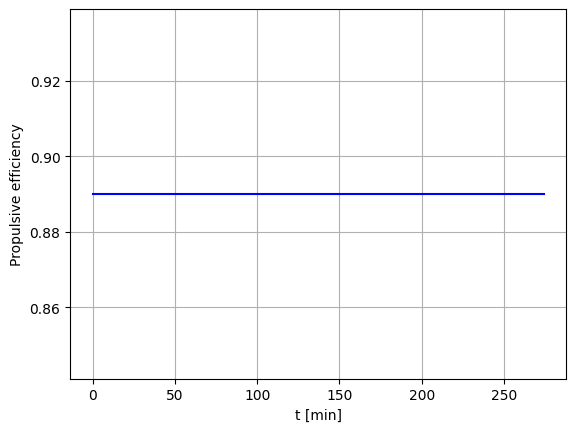

In [71]:
etaPP = np.zeros(len(times))
for t in range(len(times)):
    alt = myaircraft.mission.profile.Altitude(times[t])
    v = myaircraft.mission.profile.Velocity(times[t])
    power = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,alt,myaircraft.mission.DISA,v,'TAS')
    etaPP[t]= myaircraft.powertrain.EtaPPpw127Model(alt, v, power)
plt.plot(times/60,etaPP, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Propulsive efficiency')
plt.show()

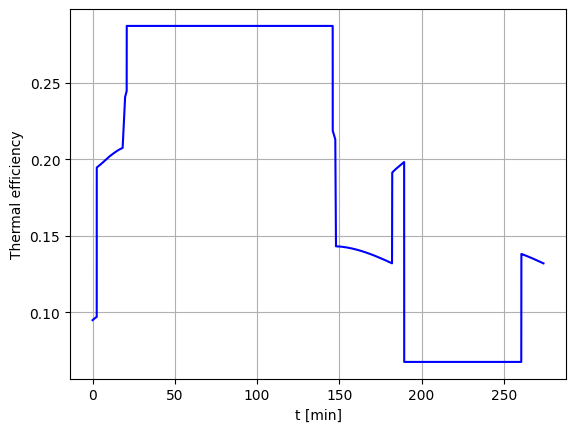

In [72]:
if myaircraft.EnergyInput['Eta Gas Turbine Model'] == 'PW127':
    etaTh = np.zeros(len(times))
    for t in range(len(times)):
        alt = myaircraft.mission.profile.Altitude(times[t])
        v = myaircraft.mission.profile.Velocity(times[t])
        power = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,alt,myaircraft.mission.DISA,v,'TAS')
        etaTh[t]= myaircraft.powertrain.EtaGTpw127Model(alt, v, power)
    plt.plot(times/60,etaTh, 'b')
    plt.grid(visible=True)
    plt.xlabel('t [min]')
    plt.ylabel('Thermal efficiency')
    plt.show()

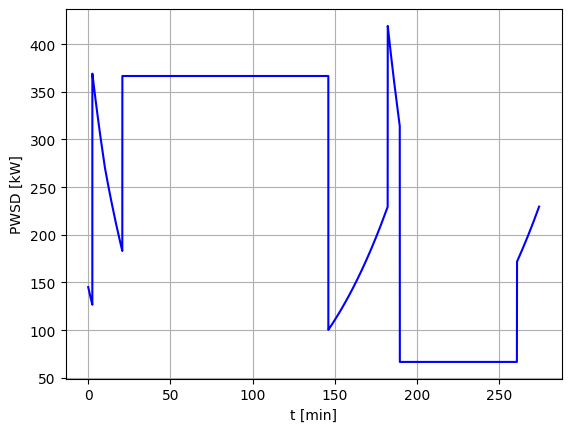

In [73]:
pwsd = np.zeros(len(times))
for t in range(len(times)):
    alt = myaircraft.mission.profile.Altitude(times[t])
    v = myaircraft.mission.profile.Velocity(times[t])
    power = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,alt,myaircraft.mission.DISA,v,'TAS')
    pwsd[t]= 1e-3*0.5*0.89*power
plt.plot(times/60,pwsd, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('PWSD [kW]')
plt.show()

Compute Payload - Range diagram


In [74]:
from scipy.optimize import brenth 

In [75]:
maxFuelCapacity = 4000 #Kg (4000 + final reserve)
MTOW = myaircraft.weight.WTO #Kg
OEW = myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.final_reserve #Kg 
MZFW =OEW + myaircraft.weight.WPayload #Kg 
WPayload = 4560 #Kg
wfuel = myaircraft.weight.Wf
designRange = 750 #nm

drng = 10 #nm

In [76]:
def funcNL(Wf, WPayload):
     return Wf - myaircraft.mission.EvaluateMission(OEW + WPayload+ Wf)/myaircraft.weight.ef

In [77]:
#1 non-limited range
missionRangeNL = np.linspace(150,designRange,num=50, endpoint=True) 
wfuelNL = []
for rng in missionRangeNL:
    newmission = pg.Mission.Mission(myaircraft)
    myaircraft.mission = newmission
    myaircraft.MissionInput['Range Mission'] = rng
    myaircraft.mission.InitializeProfile()
    myaircraft.mission.SetInput()
    wfuelNL.append(brenth(funcNL, 0, maxFuelCapacity, args=(WPayload), xtol=0.01) )

P_number:  127
P_number:  63
P_number:  31
P_number:  15
P_number:  7
P_number:  3
P_number:  1
P_number:  0
no math gnegnegne
P_number:  1
ok with mission integration


TypeError: unsupported operand type(s) for /: 'tuple' and 'float'

In [ ]:
def funcTOL(WPayload, MTOW):
     return MTOW - (OEW + WPayload + myaircraft.mission.EvaluateMission(MTOW)/myaircraft.weight.ef)

In [ ]:
#2 - MTOW-limited range
rng = designRange
wpayloadTOL = []
wfuelTOL = []
missionRangeTOL = []
while wfuel < maxFuelCapacity:
    newmission = pg.Mission.Mission(myaircraft)
    myaircraft.mission = newmission
    myaircraft.MissionInput['Range Mission'] = rng
    myaircraft.mission.InitializeProfile()
    myaircraft.mission.SetInput()
    wpayloadTOL.append( brenth(funcTOL, 0, MTOW, args=(MTOW), xtol=0.01) )
    missionRangeTOL.append(rng)
    wfuel = MTOW - ( wpayloadTOL[-1] + OEW) 
    wfuelTOL.append(wfuel)
    rng = rng + drng

In [ ]:
def funcFCL(WPayload, OEW, maxFuelCapacity):
     return maxFuelCapacity - myaircraft.mission.EvaluateMission(OEW+WPayload+maxFuelCapacity)/myaircraft.weight.ef

In [ ]:
#3 - Fuel capacity-limited range
wpload = wpayloadTOL[-1]
rng = missionRangeTOL[-1]
wpayloadFCL = []
missionRangeFCL = []
while wpload > 300:
    newmission = pg.Mission.Mission(myaircraft)
    myaircraft.mission = newmission
    myaircraft.MissionInput['Range Mission'] = rng
    myaircraft.mission.InitializeProfile()
    myaircraft.mission.SetInput()
    wpayloadFCL.append(brenth(funcFCL, 0, WPayload, args=(OEW, maxFuelCapacity), xtol=0.01) )
    wpload = wpayloadFCL[-1] 
    missionRangeFCL.append(rng)
    rng = rng + drng

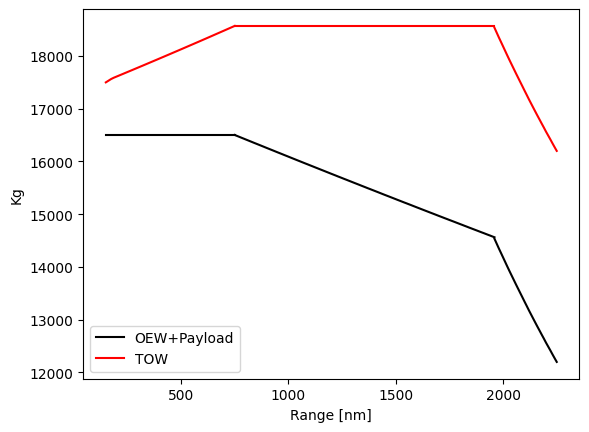

In [ ]:
plt.plot(missionRangeNL,[MZFW for i in range(len(missionRangeNL))],color='black',label='OEW+Payload')
plt.plot(missionRangeNL,np.add(MZFW,wfuelNL),color='red',label='TOW')
plt.plot(missionRangeTOL,np.subtract(MTOW,wfuelTOL),color='black')
plt.plot(missionRangeTOL,[MTOW for i in range(len(missionRangeTOL))],color='red')
plt.plot(missionRangeFCL,np.add(OEW,wpayloadFCL),color='black')
plt.plot(missionRangeFCL,np.add(OEW+maxFuelCapacity,wpayloadFCL),color='red')
plt.xlabel('Range [nm]')
plt.ylabel('Kg')
plt.legend()